<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/L5_Demonstrating_Numerical_Stability_Issues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Direct method (2/10000): 0.0002
Indirect method ((1 + 1/10000) - (1 - 1/10000)): 0.00019999999999997797
Difference: 2.2036409155767878e-17
Are they exactly equal? False

--- Softmax Numerical Stability Examples ---

Normal values: [1.  2.  3.  4.  1.5]
Naive softmax:
[0.03044919 0.08276948 0.22499077 0.61158833 0.05020223]
Sum: 0.9999999999999999
Stable softmax:
[0.03044919 0.08276948 0.22499077 0.61158833 0.05020223]
Sum: 1.0

Very large values: [100.  100.1 100.2 100.3 100.4]
Naive softmax:
[0.16212035 0.17917069 0.19801424 0.21883958 0.24185514]
Sum: 1.0
Stable softmax:
[0.16212035 0.17917069 0.19801424 0.21883958 0.24185514]
Sum: 0.9999999999999999

Mixed large and small values: [-1000.     0.  1000.]
Naive softmax (might overflow):
[ 0.  0. nan]
Sum: nan
Stable softmax:
[0. 0. 1.]
Sum: 1.0


<ipython-input-1-969f369fa11f>:20: RuntimeWarning: overflow encountered in exp
  e_x = np.exp(x)
<ipython-input-1-969f369fa11f>:21: RuntimeWarning: invalid value encountered in divide
  return e_x / np.sum(e_x)


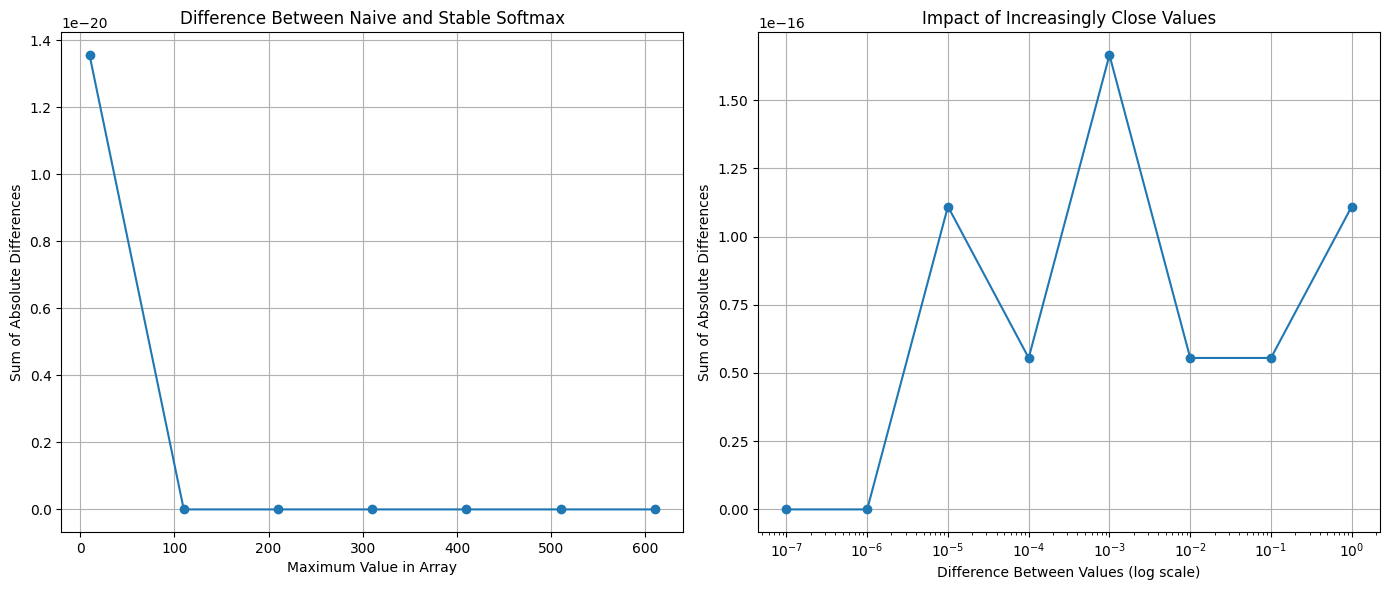


What this means for neural networks:
1. When values get very large or very small, numerical precision matters
2. The 'from_logits=True' approach allows TensorFlow to use more stable calculations
3. This results in more accurate training, especially for complex problems
4. It's particularly important when dealing with many classes or extreme values


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Let's demonstrate the numerical precision issues

# Example 1: Computing 2/10000 in two different ways
direct_method = 2/10000
print(f"Direct method (2/10000): {direct_method}")

indirect_method = (1 + 1/10000) - (1 - 1/10000)
print(f"Indirect method ((1 + 1/10000) - (1 - 1/10000)): {indirect_method}")

print(f"Difference: {direct_method - indirect_method}")
print(f"Are they exactly equal? {direct_method == indirect_method}")

# Example 2: Softmax with extreme values

def naive_softmax(x):
    """Basic softmax implementation - can have numerical issues"""
    e_x = np.exp(x)
    return e_x / np.sum(e_x)

def stable_softmax(x):
    """Numerically stable softmax implementation"""
    # Subtract the maximum value for numerical stability
    shifted_x = x - np.max(x)
    e_x = np.exp(shifted_x)
    return e_x / np.sum(e_x)

# Let's create some test cases
print("\n--- Softmax Numerical Stability Examples ---")

# Case 1: Normal range values
normal_values = np.array([1.0, 2.0, 3.0, 4.0, 1.5])
print("\nNormal values:", normal_values)

print("Naive softmax:")
print(naive_softmax(normal_values))
print("Sum:", np.sum(naive_softmax(normal_values)))

print("Stable softmax:")
print(stable_softmax(normal_values))
print("Sum:", np.sum(stable_softmax(normal_values)))

# Case 2: Very large values
large_values = np.array([100.0, 100.1, 100.2, 100.3, 100.4])
print("\nVery large values:", large_values)

print("Naive softmax:")
naive_result = naive_softmax(large_values)
print(naive_result)
print("Sum:", np.sum(naive_result))

print("Stable softmax:")
stable_result = stable_softmax(large_values)
print(stable_result)
print("Sum:", np.sum(stable_result))

# Case 3: Mixed large and small values
mixed_values = np.array([-1000.0, 0.0, 1000.0])
print("\nMixed large and small values:", mixed_values)

print("Naive softmax (might overflow):")
try:
    naive_result = naive_softmax(mixed_values)
    print(naive_result)
    print("Sum:", np.sum(naive_result))
except Exception as e:
    print(f"Error: {e}")

print("Stable softmax:")
stable_result = stable_softmax(mixed_values)
print(stable_result)
print("Sum:", np.sum(stable_result))

# Visualize the difference
plt.figure(figsize=(14, 6))

# Example with increasing magnitude
x_values = np.arange(10, 1010, 100)
differences = []

for x in x_values:
    # Create a test case with one large value
    test_case = np.array([0.0, 0.0, x])

    # Calculate using both methods
    naive = naive_softmax(test_case)
    stable = stable_softmax(test_case)

    # Store the difference
    diff = np.sum(np.abs(naive - stable))
    differences.append(diff)

plt.subplot(1, 2, 1)
plt.plot(x_values, differences, marker='o')
plt.title('Difference Between Naive and Stable Softmax')
plt.xlabel('Maximum Value in Array')
plt.ylabel('Sum of Absolute Differences')
plt.grid(True)

# Example with very close values
# Generate pairs of increasingly close values
base = 100
deltas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
close_diffs = []

for delta in deltas:
    test_case = np.array([base, base + delta])

    # The stable version will subtract the max (base)
    # So the values become [0, delta]
    naive = naive_softmax(test_case)
    stable = stable_softmax(test_case)

    diff = np.sum(np.abs(naive - stable))
    close_diffs.append(diff)

plt.subplot(1, 2, 2)
plt.semilogx(deltas, close_diffs, marker='o')
plt.title('Impact of Increasingly Close Values')
plt.xlabel('Difference Between Values (log scale)')
plt.ylabel('Sum of Absolute Differences')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nWhat this means for neural networks:")
print("1. When values get very large or very small, numerical precision matters")
print("2. The 'from_logits=True' approach allows TensorFlow to use more stable calculations")
print("3. This results in more accurate training, especially for complex problems")
print("4. It's particularly important when dealing with many classes or extreme values")